# Exploratory Data Analysis (EDA)
## Spam Classification Dataset

This notebook explores the SMS Spam Collection dataset to understand:
- Label distribution (ham vs spam)
- Message characteristics (length, vocabulary)
- Text patterns and common words
- Data quality issues
- Insights to guide preprocessing and modeling


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Set random seed for reproducibility
np.random.seed(42)


## 1. Data Loading & Basic Inspection


In [2]:
# Load the dataset
df = pd.read_csv('../data/raw/spam.csv', encoding='latin-1')

# Display basic information
print("Dataset shape:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nFirst few rows:")
df.head()


Dataset shape: (5572, 5)

Column names: ['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

First few rows:


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# Check data types and missing values
print("Data types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())
print("\nDataset info:")
df.info()


Data types:
v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

Missing values:
v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
# Clean up column names (v1 = label, v2 = message)
# Remove unnecessary columns if they exist
df = df[['v1', 'v2']].copy()
df.columns = ['label', 'message']

# Display cleaned dataset
print("Cleaned dataset:")
df.head(10)


Cleaned dataset:


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


## 2. Label Distribution


In [5]:
# Count labels
label_counts = df['label'].value_counts()
print("Label distribution:")
print(label_counts)
print(f"\nPercentage distribution:")
print(df['label'].value_counts(normalize=True) * 100)


Label distribution:
label
ham     4825
spam     747
Name: count, dtype: int64

Percentage distribution:
label
ham     86.593683
spam    13.406317
Name: proportion, dtype: float64


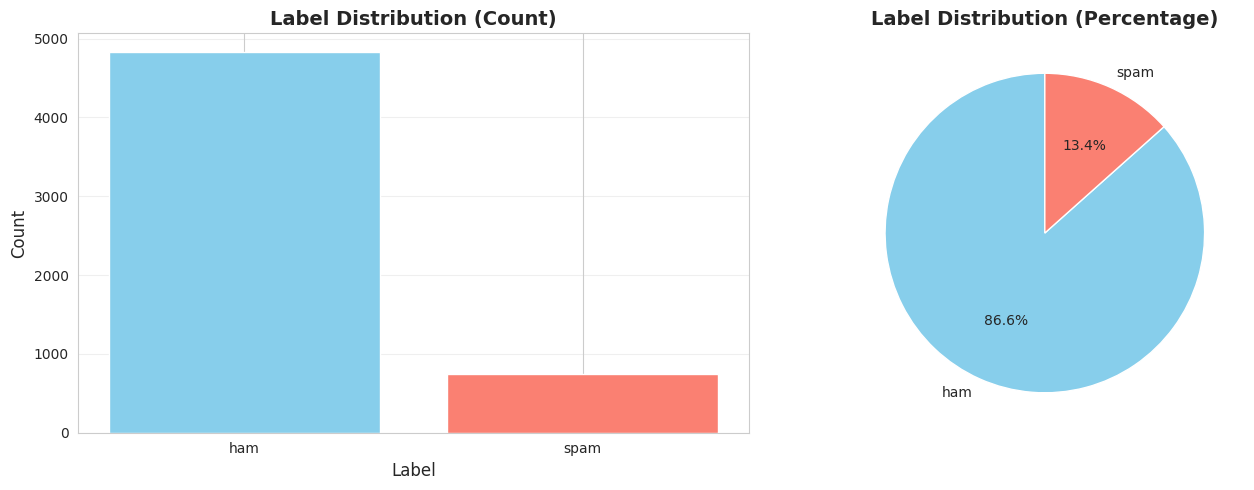

In [6]:
# Visualize label distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
axes[0].bar(label_counts.index, label_counts.values, color=['skyblue', 'salmon'])
axes[0].set_title('Label Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Label', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# Pie chart
axes[1].pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%', 
            colors=['skyblue', 'salmon'], startangle=90)
axes[1].set_title('Label Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


## 3. Message Characteristics


In [7]:
# Calculate message statistics
df['message_length'] = df['message'].str.len()
df['word_count'] = df['message'].str.split().str.len()

# Summary statistics by label
print("Message Statistics by Label:")
print(df.groupby('label')[['message_length', 'word_count']].describe())


Message Statistics by Label:
      message_length                                                           \
               count        mean        std   min    25%    50%    75%    max   
label                                                                           
ham           4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0   
spam           747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0   

      word_count                                                      
           count       mean        std  min   25%   50%   75%    max  
label                                                                 
ham       4825.0  14.200622  11.424511  1.0   7.0  11.0  19.0  171.0  
spam       747.0  23.851406   5.811898  2.0  22.0  25.0  28.0   35.0  


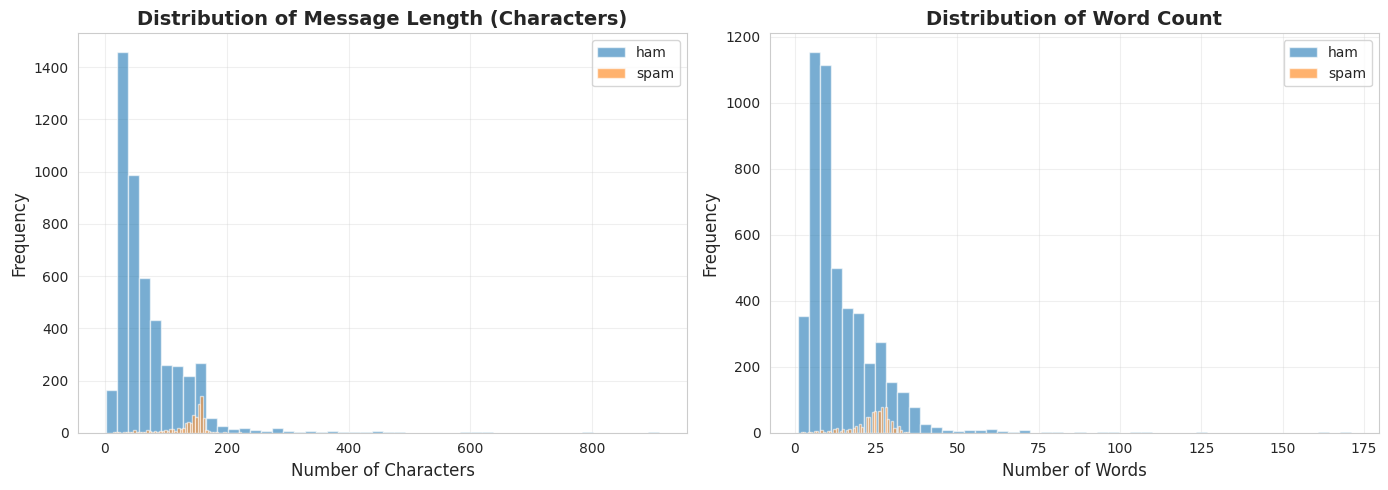

In [8]:
# Visualize message length distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Character length
for label in df['label'].unique():
    data = df[df['label'] == label]['message_length']
    axes[0].hist(data, alpha=0.6, label=label, bins=50)
axes[0].set_title('Distribution of Message Length (Characters)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Characters', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Word count
for label in df['label'].unique():
    data = df[df['label'] == label]['word_count']
    axes[1].hist(data, alpha=0.6, label=label, bins=50)
axes[1].set_title('Distribution of Word Count', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Words', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


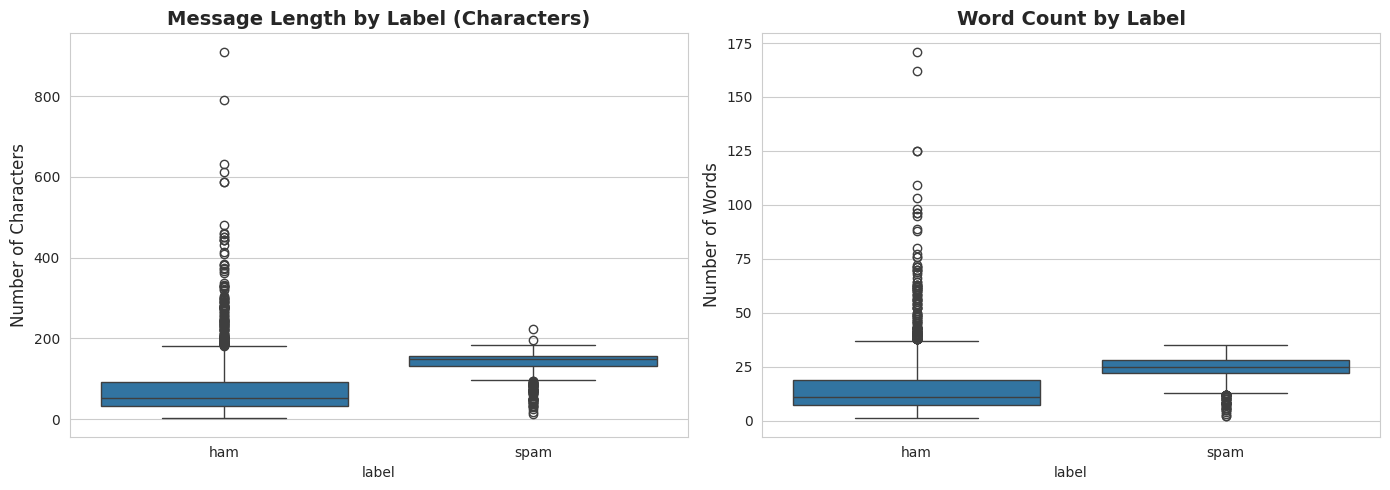

In [9]:
# Box plots for comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Character length box plot
sns.boxplot(data=df, x='label', y='message_length', ax=axes[0])
axes[0].set_title('Message Length by Label (Characters)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Number of Characters', fontsize=12)

# Word count box plot
sns.boxplot(data=df, x='label', y='word_count', ax=axes[1])
axes[1].set_title('Word Count by Label', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Number of Words', fontsize=12)

plt.tight_layout()
plt.show()


## 4. Text Analysis - Common Words


In [10]:
# Function to extract words (simple tokenization)
def get_words(text):
    # Convert to lowercase and split by whitespace
    words = re.findall(r'\b\w+\b', text.lower())
    return words

# Get all words for each label
ham_words = []
spam_words = []

for idx, row in df.iterrows():
    words = get_words(row['message'])
    if row['label'] == 'ham':
        ham_words.extend(words)
    else:
        spam_words.extend(words)

# Count word frequencies
ham_word_freq = Counter(ham_words)
spam_word_freq = Counter(spam_words)

print("Top 20 words in HAM messages:")
print(ham_word_freq.most_common(20))
print("\nTop 20 words in SPAM messages:")
print(spam_word_freq.most_common(20))


Top 20 words in HAM messages:
[('i', 2940), ('you', 1943), ('to', 1554), ('the', 1122), ('a', 1056), ('u', 1018), ('and', 857), ('in', 818), ('me', 772), ('my', 750), ('is', 732), ('it', 711), ('that', 551), ('of', 525), ('for', 501), ('s', 478), ('have', 440), ('can', 439), ('so', 435), ('but', 434)]

Top 20 words in SPAM messages:
[('to', 688), ('a', 377), ('call', 355), ('å', 299), ('you', 297), ('your', 264), ('free', 224), ('2', 206), ('the', 206), ('for', 203), ('now', 199), ('or', 188), ('u', 174), ('txt', 163), ('is', 158), ('on', 144), ('ur', 144), ('4', 137), ('have', 135), ('from', 131)]


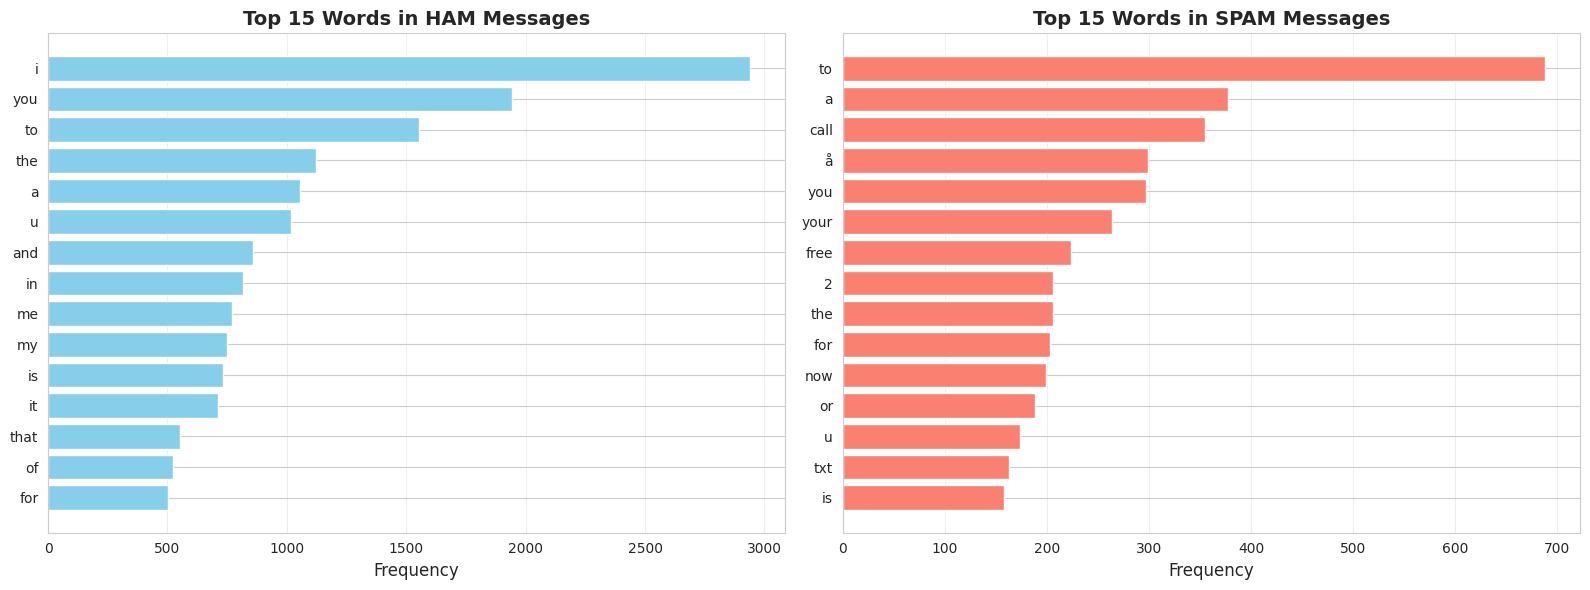

In [11]:
# Visualize top words
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top ham words
ham_top = dict(ham_word_freq.most_common(15))
axes[0].barh(range(len(ham_top)), list(ham_top.values()), color='skyblue')
axes[0].set_yticks(range(len(ham_top)))
axes[0].set_yticklabels(list(ham_top.keys()))
axes[0].invert_yaxis()
axes[0].set_title('Top 15 Words in HAM Messages', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Frequency', fontsize=12)
axes[0].grid(axis='x', alpha=0.3)

# Top spam words
spam_top = dict(spam_word_freq.most_common(15))
axes[1].barh(range(len(spam_top)), list(spam_top.values()), color='salmon')
axes[1].set_yticks(range(len(spam_top)))
axes[1].set_yticklabels(list(spam_top.keys()))
axes[1].invert_yaxis()
axes[1].set_title('Top 15 Words in SPAM Messages', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Frequency', fontsize=12)
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


## 5. Special Patterns Analysis


In [12]:
# Check for URLs, phone numbers, special characters
df['has_url'] = df['message'].str.contains(r'http|www|\.com|\.net|\.org', case=False, regex=True)
df['has_phone'] = df['message'].str.contains(r'\d{4,}', regex=True)  # 4+ consecutive digits
df['has_currency'] = df['message'].str.contains(r'£|\$|€|free|prize|win|won', case=False, regex=True)
df['all_caps_ratio'] = df['message'].apply(lambda x: sum(1 for c in x if c.isupper()) / len(x) if len(x) > 0 else 0)

# Compare patterns by label
pattern_stats = df.groupby('label')[['has_url', 'has_phone', 'has_currency']].mean()
print("Pattern frequency by label:")
print(pattern_stats)


Pattern frequency by label:
        has_url  has_phone  has_currency
label                                   
ham    0.003731   0.002694      0.047876
spam   0.165997   0.834003      0.605087


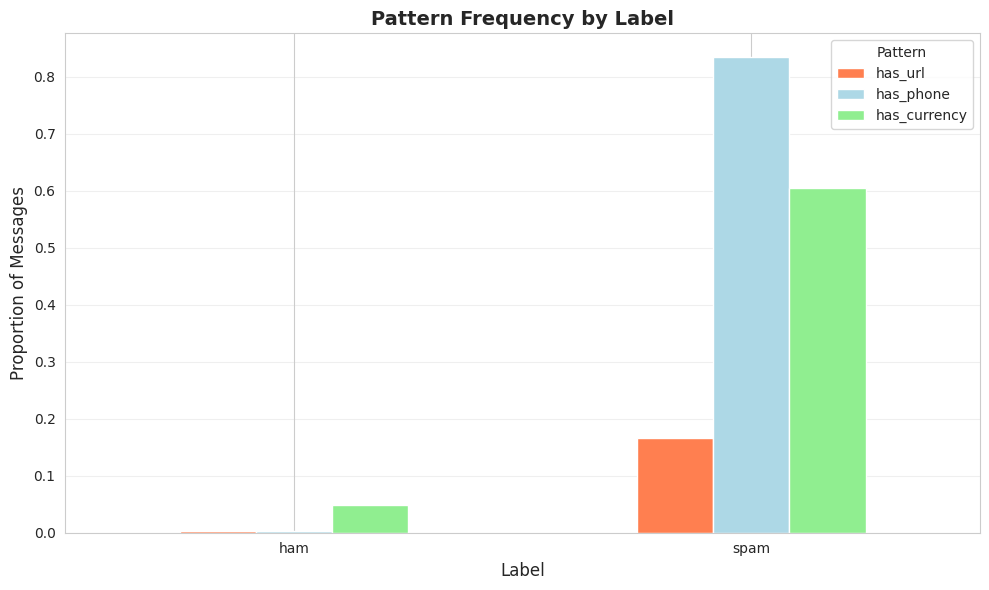

In [13]:
# Visualize pattern differences
pattern_stats.plot(kind='bar', figsize=(10, 6), color=['coral', 'lightblue', 'lightgreen'])
plt.title('Pattern Frequency by Label', fontsize=14, fontweight='bold')
plt.xlabel('Label', fontsize=12)
plt.ylabel('Proportion of Messages', fontsize=12)
plt.legend(title='Pattern', fontsize=10)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


## 6. Sample Messages


In [14]:
# Display sample messages from each class
print("=" * 80)
print("SAMPLE HAM MESSAGES:")
print("=" * 80)
for idx, msg in enumerate(df[df['label'] == 'ham']['message'].head(5), 1):
    print(f"\n{idx}. {msg}")

print("\n" + "=" * 80)
print("SAMPLE SPAM MESSAGES:")
print("=" * 80)
for idx, msg in enumerate(df[df['label'] == 'spam']['message'].head(5), 1):
    print(f"\n{idx}. {msg}")


SAMPLE HAM MESSAGES:

1. Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

2. Ok lar... Joking wif u oni...

3. U dun say so early hor... U c already then say...

4. Nah I don't think he goes to usf, he lives around here though

5. Even my brother is not like to speak with me. They treat me like aids patent.

SAMPLE SPAM MESSAGES:

1. Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

2. FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv

3. WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.

4. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile

## 7. Data Quality Checks


In [15]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check for empty messages
empty_messages = df['message'].isna().sum() | (df['message'].str.strip() == '').sum()
print(f"Number of empty messages: {empty_messages}")

# Check for very short messages
very_short = (df['word_count'] < 2).sum()
print(f"Number of messages with < 2 words: {very_short}")

# Check label consistency
print(f"\nUnique labels: {df['label'].unique()}")
print(f"Label value counts:\n{df['label'].value_counts()}")


Number of duplicate rows: 403
Number of empty messages: 0
Number of messages with < 2 words: 41

Unique labels: ['ham' 'spam']
Label value counts:
label
ham     4825
spam     747
Name: count, dtype: int64


## 8. Key Insights & Next Steps

### Summary of Findings:
1. **Label Distribution**: [Fill in after running analysis]
2. **Message Length**: [Fill in observations]
3. **Common Words**: [Fill in key differences]
4. **Patterns**: [Fill in URL/phone/currency patterns]
5. **Data Quality**: [Fill in any issues found]

### Preprocessing Recommendations:
- [Based on findings, suggest preprocessing steps]
- [Consider: lowercase, punctuation, URLs, numbers, stopwords, etc.]

### Modeling Considerations:
- [Class imbalance? Need stratified splits?]
- [Feature engineering ideas based on patterns found]
- [Which features might be most discriminative?]
